In [3]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from ast import literal_eval
import string
from PIL import Image
import PIL.ImageOps
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

app = Flask(__name__)

In [4]:
@app.route("/")
def index():
    return render_template("home.html")
df = pd.read_csv("songs_w_genres_v4.csv")
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,mode,name,popularity,release_date,speechiness,tempo,valence,year,genres,standardized_name
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,...,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,[],singende bataillone 1 teil
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,...,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,"['classical', 'early romantic era']",fantasiestücke op 111 più tosto lento
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,...,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,[],chapter 118 zamek kaniowski
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,...,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,"['tango', 'vintage tango']",bebamos juntos instrumental remasterizado
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,...,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,"['classical', 'early romantic era', 'polish cl...",polonaisefantaisie in aflat major op 61


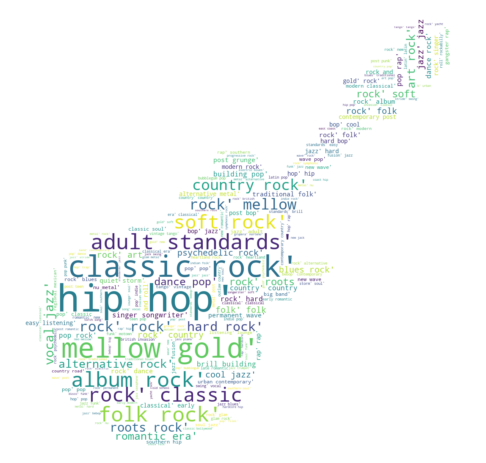

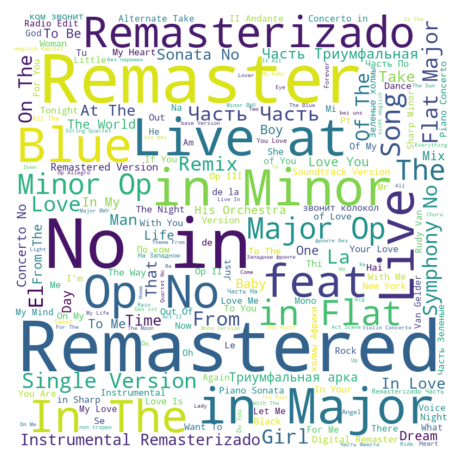

In [3]:
im = Image.open("guitar.png")
mask = np.array(im)
wordcloud = WordCloud(mask=mask, width = 800, height = 800, 
            background_color ='white').generate(' '.join(df['genres']))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


wordcloud2 = WordCloud(width = 800, height = 800, 
            background_color ='white').generate(' '.join(df['name']))

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.show()



In [5]:
df_data = df.drop(['artists', 'duration_ms', 'explicit', 'mode', 'name', 'popularity', 'release_date', 'year', 'genres', 'standardized_name'], axis=1)
df_data.index = df_data['id']
df_data = df_data.drop(['id'], axis=1)
df_data.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
id,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.563,10,0.1510,-12.428,0.0506,118.469,0.7790
6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.901,8,0.0763,-28.454,0.0462,83.972,0.0767
6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.000,5,0.1190,-19.924,0.9290,107.177,0.8800
6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.887,1,0.1110,-14.734,0.0926,108.003,0.7200
6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.908,11,0.0980,-16.829,0.0424,62.149,0.0693


In [6]:
df_data['key'] = df_data['key']/12
max_loudness = df_data['loudness'].max()
df_data['loudness'] = abs(df_data['loudness']/max_loudness)
max_tempo = df_data['tempo'].max()
df_data['tempo'] = df_data['tempo']/max_tempo
df_data.head()


,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
id,,,,,,,,,,
6KbQ3uYMLKb5jDxLF7wYDD,0.995,0.708,0.1950,0.563,0.833333,0.1510,3.223865,0.0506,0.485348,0.7790
6KuQTIu1KoTTkLXKrwlLPV,0.994,0.379,0.0135,0.901,0.666667,0.0763,7.381064,0.0462,0.344019,0.0767
6L63VW0PibdM1HDSBoqnoM,0.604,0.749,0.2200,0.000,0.416667,0.1190,5.168353,0.9290,0.439086,0.8800
6M94FkXd15sOAOQYRnWPN8,0.995,0.781,0.1300,0.887,0.083333,0.1110,3.822049,0.0926,0.442470,0.7200
6N6tiFZ9vLTSOIxkj8qKrd,0.990,0.210,0.2040,0.908,0.916667,0.0980,4.365499,0.0424,0.254614,0.0693


In [7]:
knn = NearestNeighbors(n_neighbors=50, algorithm='ball_tree')
knn.fit(df_data.values)

NearestNeighbors(algorithm='ball_tree', n_neighbors=50)

In [9]:
def standardize(s):
    s = "".join([i.lower() for i in s if i not in frozenset(string.punctuation)])
    return s

In [10]:
def matching_genres(genres1, genres2):
    genres1 = literal_eval(genres1)
    matches = list(set(genres1) & set(genres2))
    return len(matches) > 0

In [23]:
neighbors = 25000

max_duration = 360 # minutes
max_duration *= 60000 # to milliseconds

In [24]:
def recommend(id, model, duration):
    query = df_data.loc[id].to_numpy().reshape(1,-1)
    distances, indices = model.kneighbors(query,n_neighbors = neighbors)

    songs = df.loc[indices[0]].where(df['id']!=id).dropna()

    songs = songs.drop_duplicates(subset=['name','artists'])

    searched = df.where(df['id'] == id).dropna().head()
    genres = literal_eval(searched['genres'].values[0])

    if len(genres) > 0:
        songs = songs[songs['genres'].apply(matching_genres, args=([genres]))]

    duration *= 60000 # convert to milliseconds
    duration = duration if duration < max_duration else max_duration

    count = songs[songs['duration_ms'].cumsum() < duration]['id'].count()
    songs = songs.head(count + 1)

    print(songs[['name', 'artists']])

    return songs

In [13]:
def index_input():
    good_input = 0
    ind = input('Enter the index value of the required song: ')
    while not good_input:
        if not ind.isdigit():
            ind = input('Index has to be a number, please try again: ')
            continue
        ind = int(ind)
        if not ind <= df['id'].count():
            ind = input('Index has to be smaller than 169910. Please try again: ')
            continue
        good_input = 1
    return ind

In [14]:
def duration_input():
    duration = input('Enter duration of playlist in minutes: ')
    while not duration.isdigit():
        duration = input('Duration has to be a number (Leave out the word minutes). Please try again: ')
    return duration

In [22]:
name = input('Enter song title: ')
name = standardize(name)

duration = int(duration_input())

found = df[['name', 'artists', 'popularity']].where(df['standardized_name'].str.contains(name)).dropna().sort_values(ascending=False, by="popularity")
while found.empty:
    name = input('No songs found with that title. Enter a new song title.')
    name = standardize(name)
    found = df[['name', 'artists', 'popularity']].where(df['standardized_name'].str.contains(name)).dropna().sort_values(ascending=False, by="popularity")
found = found[['name', 'artists']]
print('Search results: \n', found)

ind = index_input()
id = df['id'].loc[ind]

song = df['name'].loc[ind]
artists = df['artists'].loc[ind]

print('\nSearching for', song, 'by', artists)

songs = recommend(id, knn, duration)

Enter song title:  roar

Enter duration of playlist in minutes:  10

Enter the index value of the required song:  

Search results: 
                                                      name  \
87312                                                Roar   
97107                                                Roar   
107082                                             Uproar   
161261                                        Roaring 20s   
7631    White Noise: Calming Roar of the Ocean to Fall...   
31701   Premium Brown Noise: Best of Constant Pacific ...   
70250                                       Breakers Roar   
54799                                     The Lion's Roar   
133276                                     Chewbacca Roar   
52003               The Roar of the Masses Could Be Farts   
137196                                        Lyon's Roar   
63895   I Puritani (1997 - Remaster), Act III: Alto là...   

                                                  artists  
87312                                      ['Katy Perry']  
97107                                      ['Katy Perry']  
107082  


Searching for Roar by ['Katy Perry']


                          name                  artists  duration_ms
39505             Heart Attack          ['Demi Lovato']     211533.0
125826               All Night  ['The Vamps', 'Matoma']     197640.0
23562   Me And My Broken Heart               ['Rixton']     193975.0


In [0]:
searched = df.where(df['id'] == id).dropna().head()

pd.concat([searched,songs]).head()
if __name__ == "__main__":
    app.run(debug=True)





















